## Adult Salary Prediction

#### PROBLEM STATEMENT

Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not.

We have been given 14 features

In [1]:
import numpy as np # mathematical calculation
import pandas as pd  # data preprocessing 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns# data visualization
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\pc613\Downloads\adult_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [4]:
len(df.columns)

15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel=' salary', ylabel='count'>

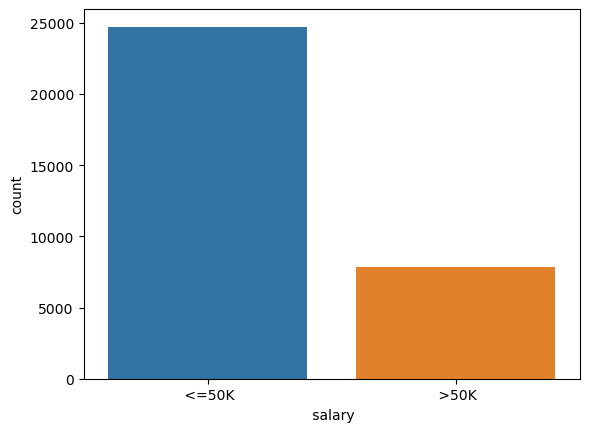

In [8]:
sns.countplot(x=' salary',data=df ) 

In [9]:
df[" salary"].value_counts()

 salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [10]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}") # COUNT IN PERCENTAGE
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


## Exploratory data analysis and Feature Engineering

In [11]:
## Here we will check the missing values in our dataset
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [12]:
numerical = [i for i in df.columns if df[i].dtypes != "O"] #using list compression in numerical data
numerical

['age',
 ' fnlwgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

In [13]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}") # using loop

 age  :  73
  fnlwgt  :  21648
  education-num  :  16
  capital-gain  :  119
  capital-loss  :  92
  hours-per-week  :  94


In [14]:
df[" education-num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

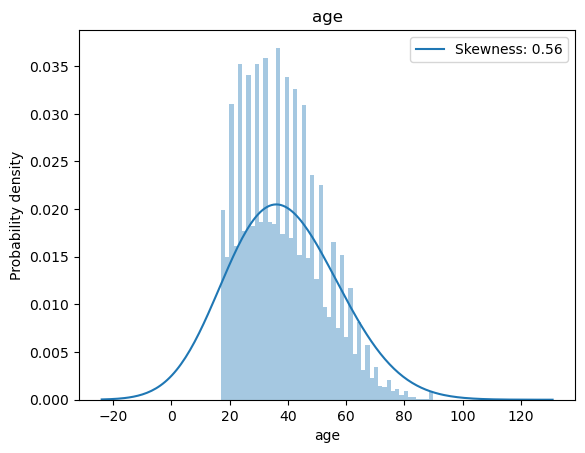

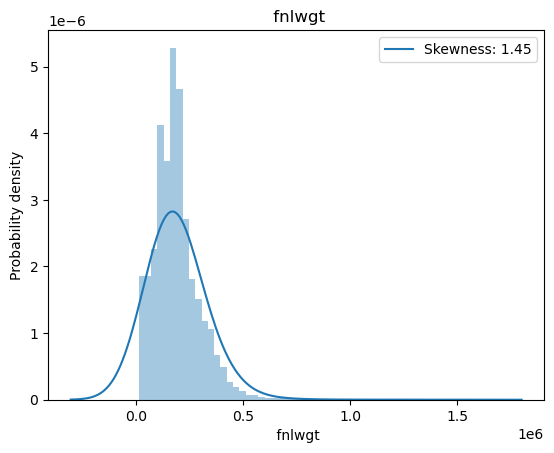

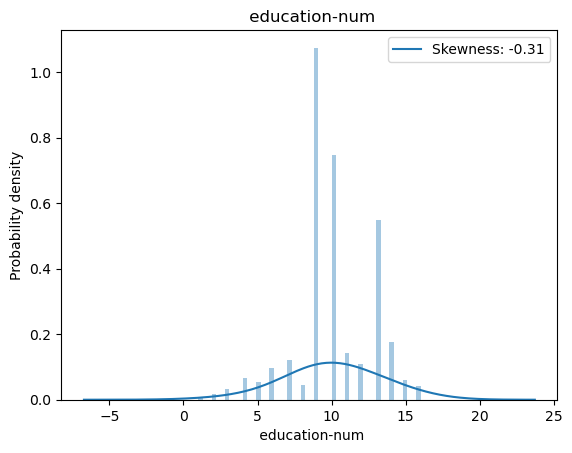

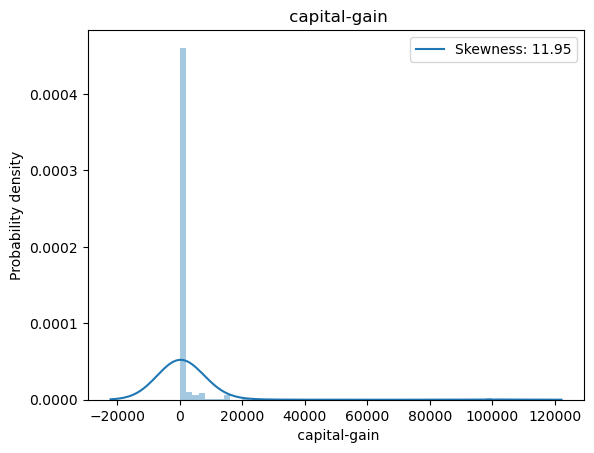

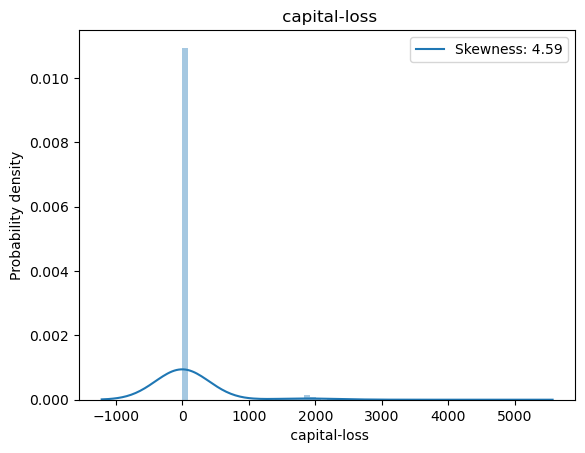

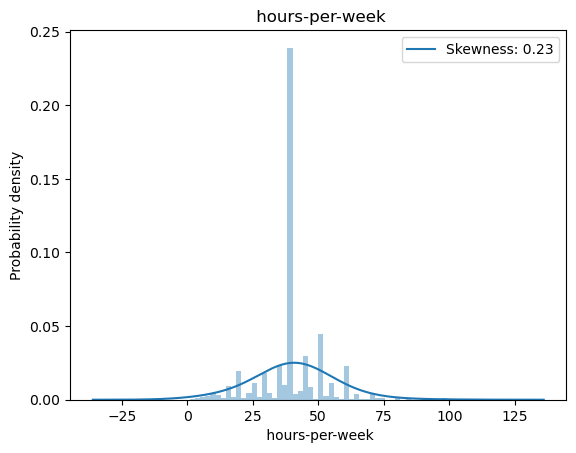

In [15]:
for feature in numerical:
    bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1}) 
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())]) # cheking skewness 
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [16]:
df["age"] = np.log(df["age"])        #applying log
df[" fnlwgt"] = np.log(df[" fnlwgt"])

In [17]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

## Handling categorical data

In [18]:
categorical = [i for i in df.columns if df[i].dtypes == "O"] #using list compression in categorical data

In [19]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  9
  education  :  16
  marital-status  :  7
  occupation  :  15
  relationship  :  6
  race  :  5
  sex  :  2
  native-country  :  42
  salary  :  2


In [20]:
for feature in  categorical:
    print(df[feature].value_counts()) # checking fequency(unique values)
    print("\n \n ")

 workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

 
 
 education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

 
 
 marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

 
 
 occupation
 Prof-specialty       

## Handling missing values in categorical features

In [21]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")        #checking missing values percentage
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [22]:
df[" workclass"].mode()[0]

' Private'

In [23]:
df[" occupation"].mode()[0]

' Prof-specialty'

In [24]:
 df[" native-country"].mode()[0]

' United-States'

#### here we have less than 6 percent missing values so we can fill it with mode value

In [25]:
df[" workclass"] = df[' workclass'].str.replace('?', 'Private' )                # replace ? mark
df[' occupation'] = df[' occupation'].str.replace('?', 'Prof-specialty' )
df[' native-country'] = df[' native-country'].str.replace('?', 'United-States' )

In [26]:
# education Category
df[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True) # all subcatagory to one category 
df[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)


In [27]:
#martial status
df[' marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df[' marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)
#  all subcatagory change to one category 

In [28]:
# income
df[" salary"] = df[" salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True) # target category cheng to (0,1)

In [29]:
df.head() # check first 5 records

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,3.637586,Private,12.281393,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3.970292,Private,12.366153,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,3.332205,Private,12.732011,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [30]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}") # checking unique values

  workclass  :  8
  education  :  6
  marital-status  :  3
  occupation  :  14
  relationship  :  6
  race  :  5
  sex  :  2
  native-country  :  41
  salary  :  2


In [31]:
df[" education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

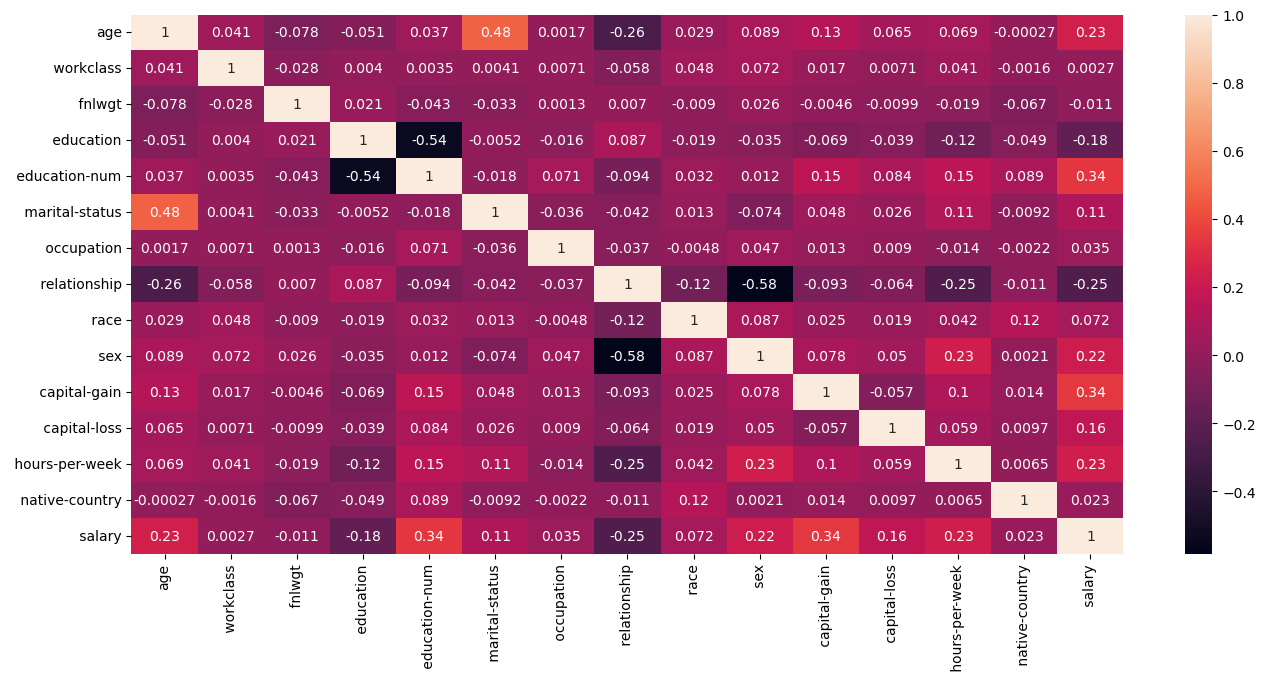

In [58]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

In [34]:
from sklearn.preprocessing import  LabelEncoder

In [35]:
df = df.apply(LabelEncoder().fit_transform)
df .head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4,0


In [36]:
#sns.pairplot(df ,  height=10 ) ## Multivariate analysis

In [37]:
X_train = df.iloc[:,:-1] # separate x trai and y train
y_train = df[" salary"]

## Feature engineering on test data

In [38]:
df_test = pd.read_csv(r"C:\Users\pc613\Downloads\adult_test.csv")
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [39]:
## apply log on skewed data
df_test["age"] = np.log(df_test["age"])
df_test[" fnlwgt"] = np.log(df_test[" fnlwgt"])

## handling missing values in categorical variable
df_test[" workclass"] = df_test[' workclass'].str.replace('?', 'Private' )
df_test[' occupation'] = df_test[' occupation'].str.replace('?', 'Prof-specialty' )
df_test[' native-country'] = df_test[' native-country'].str.replace('?', 'United-States' )

# education Category
df_test[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df_test[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

#martial status
df_test[' marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df_test[' marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)


# income
df_test[" salary"] = df_test[" salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

df_test = df_test.apply(LabelEncoder().fit_transform) # applying lable encoder

In [40]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,8,3,8931,5,6,0,6,3,2,1,0,0,39,37,0
1,21,3,1888,2,8,1,4,0,4,1,0,0,49,37,0
2,11,1,11540,4,11,1,10,0,4,1,0,0,39,37,1
3,27,3,5146,4,9,1,6,0,2,1,90,0,39,37,1
4,1,3,2450,4,9,0,9,3,4,0,0,0,29,37,0


In [41]:
df_test.shape

(16281, 15)

In [42]:
X_test = df_test.iloc[:,:-1]
y_test = df_test[" salary"]

In [43]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")#handle unbalanced data
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
accuracy_score(y_test, prediction)

0.7670904735581352

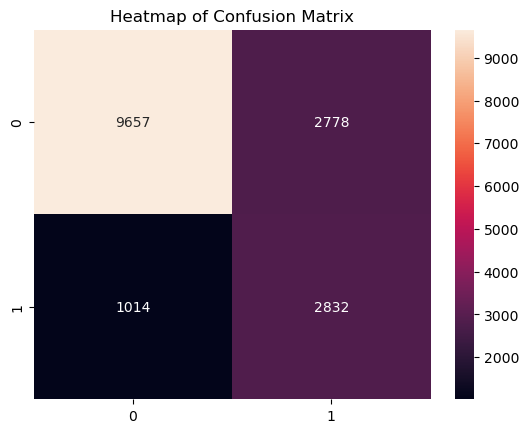

In [46]:
cm = confusion_matrix(y_test, prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()


In [47]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     12435
           1       0.50      0.74      0.60      3846

    accuracy                           0.77     16281
   macro avg       0.70      0.76      0.72     16281
weighted avg       0.81      0.77      0.78     16281



## Random Forest

In [48]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8474295190713101

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.74      0.55      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



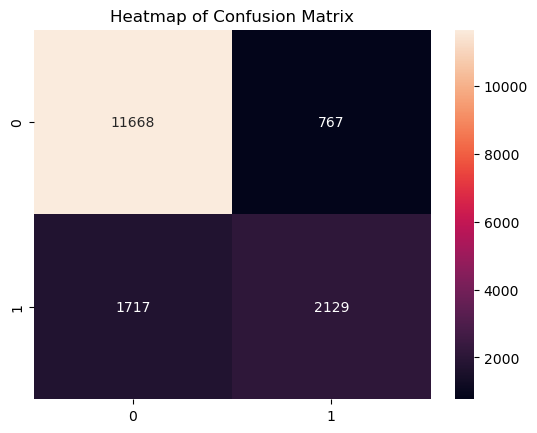

In [50]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

## Hyperparameter tuning with random forest

In [51]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[1,2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf': [1,2,3,4],
              }

In [52]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3 ,random_state = 23)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=20,
                                                    random_state=51),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   random_state=23, scoring='roc_auc', verbose=3)

In [53]:
random_search.best_params_ # checking best parameter

{'n_estimators': 200,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': False}

In [54]:
random_search.best_estimator_ #checking best estimer

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features=3, min_samples_leaf=2, n_estimators=200,
                       random_state=51)

In [55]:
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=2, n_estimators=200, random_state=51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8047417234813586

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     12435
           1       0.56      0.86      0.68      3846

    accuracy                           0.80     16281
   macro avg       0.75      0.83      0.77     16281
weighted avg       0.86      0.80      0.82     16281



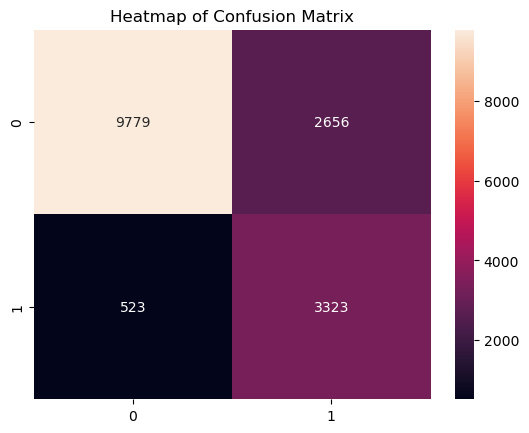

In [57]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()


In [61]:
from sklearn.model_selection import cross_val_score

In [66]:
classifiers = {'Logistic Regression': LogisticRegression(),   #to compare and check best acc
              'Random Forest': RandomForestClassifier()}
for clf_name, clf in classifiers.items():
    
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name}: Accuracy = {accuracy:.4f}' )

Logistic Regression: Accuracy = 0.8265
Random Forest: Accuracy = 0.8498


## conclusion:

The performnce comparison of different classifiers on our dataset resulted in the following accuracies:
1. Logistic Regression = 0.8265
2. Random Forest = 0.8498

in this particular run Logistic Regression achieved lower accuracy as compared to Random Forest classifier i.e 0.8498
so for our model best algorithm is RandomForestClassifier, by using this we got higher accuracy(0.8498).